# Homework 15: Linear regression
**Conditions**: use load_iris dataset, update target to 2 possible values instead of 3

**Goal**: learn how to use linear regression, check several metrics of the model

**Acceptance criteria**: workable linear regression model

1. Importing the needed libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

2. Loading the Iris dataset from Scikit-learn and formating it to pandas dataframe

In [2]:
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

3. Replacing target values 1&2 with 1

In [3]:
data.target = data.target.apply(lambda x: 0 if x == 0.0 else 1)

4. Checking target value to avoid NaNs

In [4]:
data['target'].unique()

array([0, 1])

5. Checking feature values to avoid NaNs

In [5]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

6. Checking correlations between features and target value

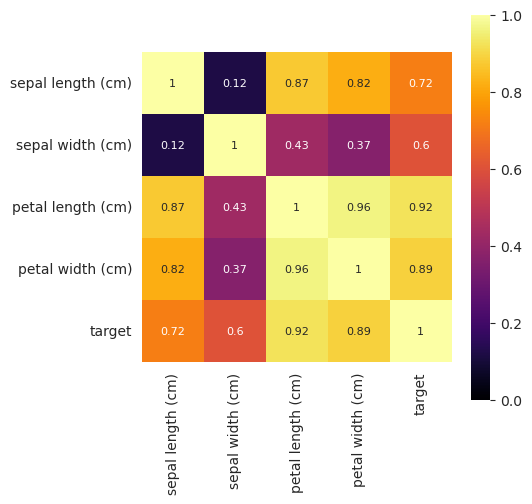

In [6]:
corr = data.corr()
plt.subplots(figsize=(5, 5))
sns.heatmap(
    abs(corr),
    vmax=1.0, vmin=0.0,
    annot=True, annot_kws={'size': 8},
    square=True, cmap='inferno'
)
plt.show()

High correlation between features (> 0.8) excl. target:
- sepal length & petal length = 0.87
- sepal length & petal width = 0.82
- pedal length & petal width = 0.96

High correlation with target:
- petal length = 0.92
- petal width = 0.89

=> Some features can be removed from dataset as high-correlated.
Creating a new dataset to compare model quality with original dataset

In [7]:
to_remove = ['sepal length (cm)', 'petal width (cm)']

In [8]:
data_dropped = data.drop(to_remove, axis=1)
data_dropped

,sepal width (cm),petal length (cm),target
0,3.5,1.4,0
1,3.0,1.4,0
2,3.2,1.3,0
3,3.1,1.5,0
4,3.6,1.4,0
...,...,...,...
145,3.0,5.2,1
146,2.5,5.0,1
147,3.0,5.2,1
148,3.4,5.4,1


7. Spliting the data and target into training/testing sets

In [9]:
X = data.drop('target',axis=1)
y = data['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

8. Creating linear regression object

In [11]:
regr = LinearRegression()

9. Training the model using the training sets
10. Making predictions using the testing set

In [12]:
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

11. Using metrics to check model efficiency.

In [13]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

12. Same steps 7-11 but for updated dataset without high-correlated features

In [14]:
X_corr = data_dropped.drop('target',axis=1)
y_corr = data_dropped['target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.3, random_state=42)

In [16]:
regr2 = LinearRegression()
regr2.fit(X_train,y_train)
y_pred2 = regr2.predict(X_test)
MAE_corr = mean_absolute_error(y_test,y_pred2)
MSE_corr = mean_squared_error(y_test,y_pred2)
R2_corr = r2_score(y_test,y_pred2)

13. Creating a table to compare metrics

In [17]:
df = pd.DataFrame(columns = ['Metrics', 'Original Dataset', 'Updated Dataset'])

In [18]:
df = df.append({'Metrics' : 'MAE', 'Original Dataset' : MAE, 'Updated Dataset' : MAE_corr},
               ignore_index = True)

df = df.append({'Metrics' : 'MSE', 'Original Dataset' : MSE, 'Updated Dataset' : MSE_corr},
               ignore_index = True)

df = df.append({'Metrics' : 'R2', 'Original Dataset' : R2, 'Updated Dataset' : R2_corr},
               ignore_index = True)

/tmp/ipykernel_9518/2988172267.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Metrics' : 'MAE', 'Original Dataset' : MAE, 'Updated Dataset' : MAE_corr},
/tmp/ipykernel_9518/2988172267.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Metrics' : 'MSE', 'Original Dataset' : MSE, 'Updated Dataset' : MSE_corr},
/tmp/ipykernel_9518/2988172267.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Metrics' : 'R2', 'Original Dataset' : R2, 'Updated Dataset' : R2_corr},


In [19]:
df

,Metrics,Original Dataset,Updated Dataset
0,MAE,0.133732,0.129327
1,MSE,0.025280,0.025713
2,R2,0.896374,0.894599
